<a href="https://colab.research.google.com/github/maximus2009asus-dot/-/blob/main/____.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект по Machine learning и Deep learning.


---


  Авторы проекта: Михайличенко Максим Сергеевич, Дорджиев Тимур Владимирович

---

## Импорт библиотек.

Установка библиотеки catboost.

In [ ]:
!pip install mlcroissant

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.3/145.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.2/587.2 kB 11.3 MB/s eta 0:00:00
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15127 sha256=e6191f50b39696237fd816c955ff51459ccec7ff45a194c2c4908f215e1d9a1a
  Stored in directory: /root/.cache/pip/wheels/e5/8d/50/ee73263c97069bd6040ff40633d444fefaac7beff73abe81a7
Successfully built jsonpath-rw


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.3 MB/s eta 0:00:00



Импорт всех необходимых библиотек.

In [ ]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import mlcroissant as mlc

import warnings
warnings.filterwarnings('ignore')

import lightgbm as lgb
import xgboost as xgb
import catboost as cb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import (VotingClassifier, BaggingClassifier,
                            RandomForestClassifier, AdaBoostClassifier,
                            GradientBoostingClassifier)


import folium
from folium.plugins import HeatMap
import plotly.express as px

# Настройка графиков
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
sns.set_palette("husl")
plt.figure(figsize = (17, 8))

print("Библиотеки успешно импортированы!")

Библиотеки успешно импортированы!


<Figure size 1700x800 with 0 Axes>

## Загрузка данных и основная информация.

Будем работать с датасетом **Hotel booking demand** (Спрос на бронирование отелей) - реальньные данные о спросе двух типов отелей за 3 года.

Датасет взят с Kaggle.

Ссылка: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

In [ ]:
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/croissant/download')

record_sets = croissant_dataset.metadata.record_sets

df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))

for col in df.columns:
    if df[col].dtype == 'O':
        try:
            df[col] = df[col].str.decode('utf-8')
        except (AttributeError, UnicodeDecodeError):
            continue
df.columns = df.columns.str.removeprefix('hotel_bookings.csv/')
df['reservation_status_date'] = df['reservation_status_date'].astype(str)
df['agent'] = df['agent'].astype('float64')
df.head()

  -  [Metadata(Hotel booking demand)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,None,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,None,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,None,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,None,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,None,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
print("+--------- Информация о датасете ---------+")
print(df.info())
print("\n+--------- Основная статистика ---------+")
print(df.describe())
print("\n+--------- Типы данных ---------+")
print(df.dtypes)

+--------- Информация о датасете ---------+
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          11

## Распределение цельевой переменной (is_canceled).


1 - бронирование было отменено

0 - бронирование подтверждено

+-------- Распределение целевой переменной --------+
is_canceled
0    75166
1    44224
Name: count, dtype: int64

Процентное соотношение:
is_canceled
0    62.958372
1    37.041628
Name: proportion, dtype: float64


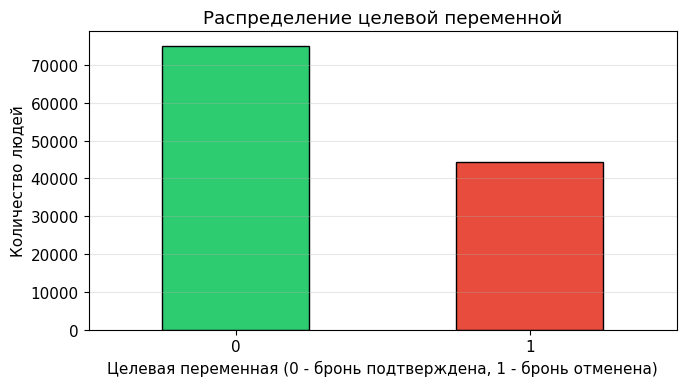

In [ ]:
print("+-------- Распределение целевой переменной --------+")
print(df['is_canceled'].value_counts())
print("\nПроцентное соотношение:")
print(df['is_canceled'].value_counts(normalize=True) * 100)

plt.figure(figsize=(7, 4))
df['is_canceled'].value_counts().plot(kind='bar', color=['#2ecc71','#e74c3c'], edgecolor='black')
plt.xlabel('Целевая переменная (0 - бронь подтверждена, 1 - бронь отменена)')
plt.ylabel('Количество людей')
plt.title('Распределение целевой переменной')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


## Проверка пропусков и их заполнение.

+--------- Проверка пропусков ---------+
          Пропущено значений  Процент пропусков
company               112593          94.306893
agent                  16340          13.686238
country                  488           0.408744
children                   4           0.003350


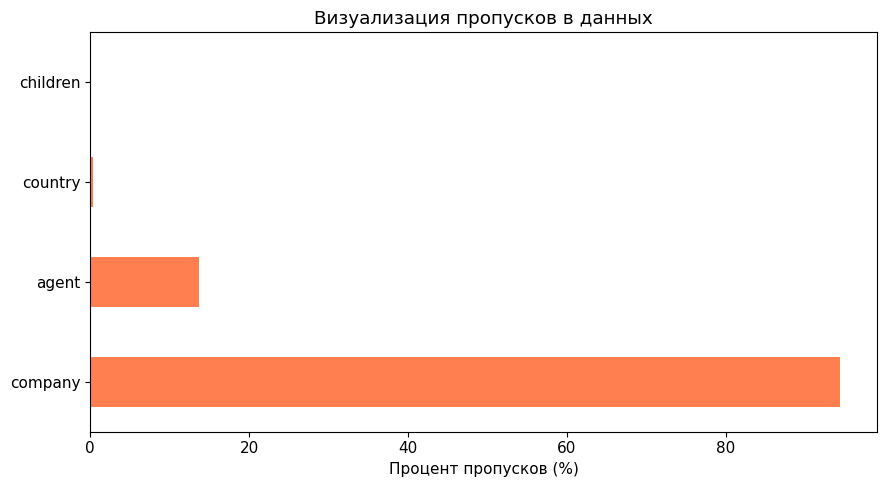

In [ ]:
print("+--------- Проверка пропусков ---------+")
missing = df.isnull().sum()
missing_percent = 100 * missing / len(df)
missing_df = pd.DataFrame({
    'Пропущено значений': missing,
    'Процент пропусков': missing_percent
})
missing_df = missing_df[missing_df['Пропущено значений'] > 0].sort_values('Пропущено значений', ascending=False)
print(missing_df)

plt.figure(figsize=(9, 5))
missing_df['Процент пропусков'].plot(kind='barh', color='coral')
plt.xlabel('Процент пропусков (%)')
plt.title('Визуализация пропусков в данных')
plt.tight_layout()
plt.show()

### Обработка пропусков.



 ### Удаление столбца company.

В столбце company очень много пропусков.
 Для более хорошего результата удалим его.

In [ ]:
df_clean = df.copy()

print(f"Количество пропусков в company: {df_clean['company'].isnull().sum()} это в процентах {df_clean['company'].isnull().sum() / len(df_clean) * 100:.1f}% ")
# Удаление столбца company
df_clean = df_clean.drop('company', axis=1)
print(f"\nСтолбец company удалён. Новый размер: {df_clean.shape}")

Количество пропусков в company: 112593 это в процентах 94.3% 

Столбец company удалён. Новый размер: (119390, 31)


### Заполнение пропусков в agent.

Заполним пропуски с помощью моды (mode) - наиболее частое значение.

agent - котигориальная переменная.

Пропусков в agent: 16340

Распределение значений agent (до обработки):
agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
197.0        1
294.0        1
388.0        1
453.0        1
480.0        1
Name: count, Length: 333, dtype: int64

Мода (наиболее частое значение): 9.0

Распределение значений agent (после обработки):
agent
9.0      48301
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
197.0        1
294.0        1
388.0        1
453.0        1
480.0        1
Name: count, Length: 333, dtype: int64
Пропусков в agent после обработки: 0


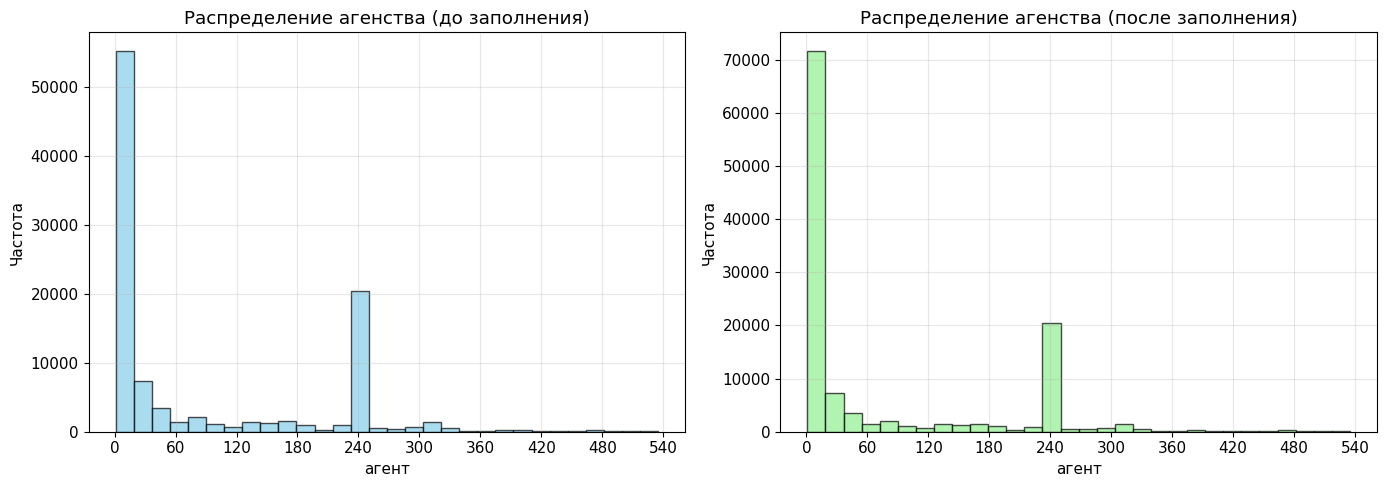

In [ ]:
from matplotlib.ticker import MaxNLocator

print(f"Пропусков в agent: {df_clean['agent'].isnull().sum()}")
print(f"\nРаспределение значений agent (до обработки):")
print(df_clean['agent'].value_counts())

agent_mode = df_clean['agent'].mode()[0]
print(f"\nМода (наиболее частое значение): {agent_mode}")

df_clean['agent'].fillna(agent_mode, inplace=True)

print(f"\nРаспределение значений agent (после обработки):")
print(df_clean['agent'].value_counts())

print(f"Пропусков в agent после обработки: {df_clean['agent'].isnull().sum()}")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1
axes[0].hist(df['agent'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('агент')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение агенства (до заполнения)')
axes[0].grid(True, alpha=0.3)
axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))


# График 2
axes[1].hist(df_clean['agent'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('агент')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение агенства (после заполнения)')
axes[1].grid(True, alpha=0.3)
axes[1].xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

### Заполнение пропусков в столбце country.


Заполним пропуски с помощью моды (mode).

country - котигориальная переменная.


In [ ]:
print(f"Пропусков в country: {df_clean['country'].isnull().sum()}")
print(f"\nРаспределение значений country:")
print(df_clean['country'].value_counts())

country_mode = df_clean['country'].mode()[0]
print(f"\nМода (наиболее частое значение): {country_mode}")

df_clean['country'].fillna(country_mode, inplace=True)

print(f"\nПропусков в country после обработки: {df_clean['country'].isnull().sum()}")

Пропусков в country: 488

Распределение значений country:
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MRT        1
KIR        1
SDN        1
ATF        1
SLE        1
Name: count, Length: 177, dtype: int64

Мода (наиболее частое значение): PRT

Пропусков в country после обработки: 0


### Обработка пропусков в children.

Заполним пропуски с помощью медианы значений (median).

Пропусков в children до обработки: 4
Медиана кол-ва детей: 0.0
Пропусков в children после обработки: 0


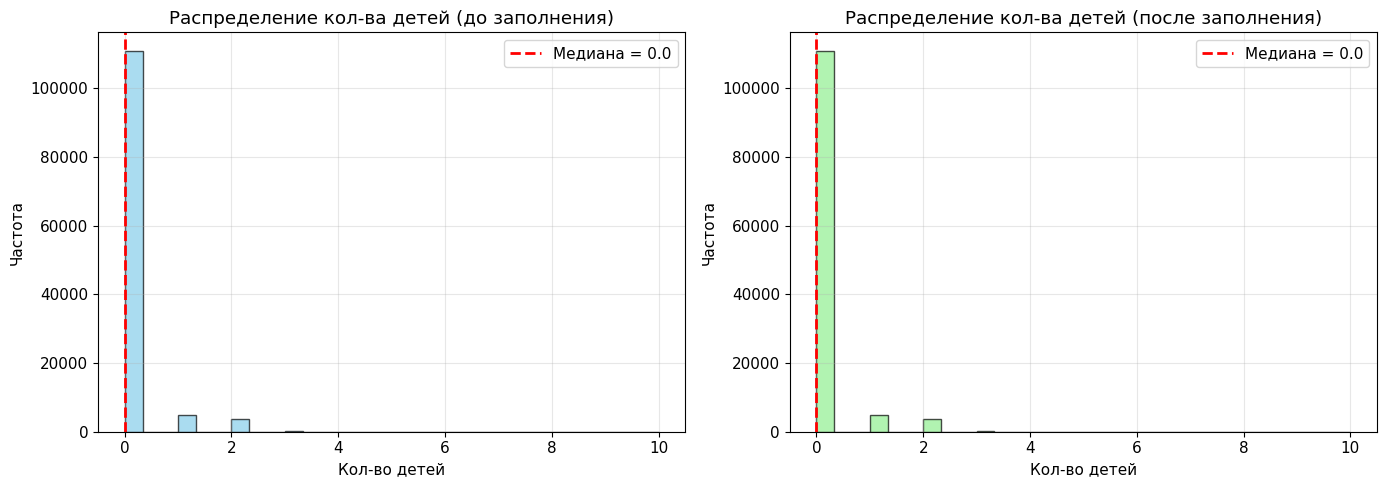

In [ ]:
print(f"Пропусков в children до обработки: {df_clean['children'].isnull().sum()}")

children_median = df_clean['children'].median()
print(f"Медиана кол-ва детей: {children_median:.1f}")

df_clean['children'].fillna(children_median, inplace=True)

print(f"Пропусков в children после обработки: {df_clean['children'].isnull().sum()}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['children'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['children'].median(), color='red', linestyle='--', linewidth=2, label=f'Медиана = {df["children"].median():.1f}')
axes[0].set_xlabel('Кол-во детей')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение кол-ва детей (до заполнения)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].hist(df_clean['children'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1].axvline(children_median, color='red', linestyle='--', linewidth=2, label=f'Медиана = {children_median:.1f}')
axes[1].set_xlabel('Кол-во детей')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение кол-ва детей (после заполнения)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## EDA

### Посмотрим, гости каких стран заселялись в эти отели.

In [ ]:
country_count = df_clean[df_clean['is_canceled'] == 0]['country'].value_counts().reset_index()
country_count.columns = ['country', 'No of guests']
country_count

,country,No of guests
0,PRT,21492
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,KIR,1
161,ATF,1
162,TJK,1
163,SLE,1


In [ ]:
# Посмотрим на распределение гостей по странам с помощью библиотеки folium
country_map = folium.Map()
pouple_map = px.choropleth(country_count,
                           locations = country_count['country'],
                           color = country_count['No of guests'],
                           hover_name = country_count['country'],
                           color_continuous_scale='YlOrRd')
pouple_map.update_layout(
    title_text='<b>Распределение гостей по странам</b>',
    title_x=0.5
)

pouple_map.show()

### Посмотрим сколько гости платят по месяцам за год

In [ ]:
# Курортный отель
resort = df_clean[(df_clean['hotel'] == 'Resort Hotel') & (df_clean['is_canceled'] == 0)]
# Городской отель
city = df_clean[(df_clean['hotel'] == 'City Hotel') & (df_clean['is_canceled'] == 0)]

resort_hotel = resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

all_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
all_hotel.columns = ['месяц', 'цена за курортный отель', 'цена за городской отель']
all_hotel

,месяц,цена за курортный отель,цена за городской отель
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


In [ ]:
# Плата за одну ночь по месяцам в двух отелях
px.line(all_hotel,
        x = 'месяц',
        y = ['цена за курортный отель','цена за городской отель'],
        title = 'Плата за одну ночь по месяцам',
        labels = {'variable':'Тип отеля','value':'Цена'})

### Количество гостей в отелях по месяцам

In [ ]:
resort_guests = resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
city_guests = city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['Месяц','Кол-во гостей в курортном отеле','Кол-во гостей в городском отеле']
final_guests

,Месяц,Кол-во гостей в курортном отеле,Кол-во гостей в городском отеле
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


In [ ]:
px.line(final_guests,
        x = 'Месяц',
        y = ['Кол-во гостей в курортном отеле','Кол-во гостей в городском отеле'],
        title='Кол-во гостей в отелях',
        labels = {'variable':'Кол-во гостей','value':'Тип отеля'})

## Подготовка данных

### Удаление ненужных столбцов

Удалим столбцы из датасета, которые не влияют на цельевую переменную.

У нас есть столбец reservation_status_date, где указана полная дата, поэтому удляем столбцы arrival_date_month, arrival_date_year.

Сотолбцы country, booking_changes, assigned_room_type и days_in_waiting_list не влияют на предсказания поэтому уберем их.

In [ ]:
# Список ненужных столбцов
useless_col = ['days_in_waiting_list', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country','arrival_date_month', 'arrival_date_year']

df_clean.drop(useless_col, axis = 1, inplace = True)

### Обработка категориальных переменных

In [ ]:
# Отделяем столбцы с категориальными данными для более простой обработки
categorical_cols = [col for col in df_clean.columns if df_clean[col].dtype == 'O']
categorical_df = df_clean[categorical_cols]
categorical_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


Разделим дату на год месяц и число

In [ ]:
categorical_df['reservation_status_date'] = pd.to_datetime(categorical_df['reservation_status_date'])

# Создаем столбец year
categorical_df['year'] = categorical_df['reservation_status_date'].dt.year
# Создаем столбец month
categorical_df['month'] = categorical_df['reservation_status_date'].dt.month
# Создаем столбец day
categorical_df['day'] = categorical_df['reservation_status_date'].dt.day
# Удаляем столбцы reservation_status_date и arrival_date_month
categorical_df.drop(['reservation_status_date'] , axis = 1, inplace = True)

categorical_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [ ]:
# Посмотрим какие объекты включают в себя категориальные столбцы
for col in categorical_df.columns:
    print(f"{col}: \n{categorical_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



Обработка катигориальных переменных

Будем кодировать котегориальные переменные с помощью label_encoding

In [ ]:
columns_to_encode = ['hotel',
                     'meal',
                     'reserved_room_type',
                     'market_segment',
                     'distribution_channel',
                     'deposit_type',
                     'customer_type',
                     'year']
label_encoder = {}

print("Соответствия кодирования:")

for column in columns_to_encode:
    le = LabelEncoder()

    categorical_df[column] = le.fit_transform(categorical_df[column])
    label_encoder[column] = le

    print(f"\n{column}:")
    for label, encoded in zip(le.classes_, range(len(le.classes_))):
        print(f"  {label} = {encoded}")

Соответствия кодирования:

hotel:
  City Hotel = 0
  Resort Hotel = 1

meal:
  BB = 0
  FB = 1
  HB = 2
  SC = 3
  Undefined = 4

reserved_room_type:
  A = 0
  B = 1
  C = 2
  D = 3
  E = 4
  F = 5
  G = 6
  H = 7
  L = 8
  P = 9

market_segment:
  Aviation = 0
  Complementary = 1
  Corporate = 2
  Direct = 3
  Groups = 4
  Offline TA/TO = 5
  Online TA = 6
  Undefined = 7

distribution_channel:
  Corporate = 0
  Direct = 1
  GDS = 2
  TA/TO = 3
  Undefined = 4

deposit_type:
  No Deposit = 0
  Non Refund = 1
  Refundable = 2

customer_type:
  Contract = 0
  Group = 1
  Transient = 2
  Transient-Party = 3

year:
  2014 = 0
  2015 = 1
  2016 = 2
  2017 = 3


In [ ]:
print('Категориальные данные после обработки')
categorical_df.head()

Категориальные данные после обработки


,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,1,0,3,1,2,0,2,1,7,1
1,1,0,3,1,2,0,2,1,7,1
2,1,0,3,1,0,0,2,1,7,2
3,1,0,2,0,0,0,2,1,7,2
4,1,0,6,3,0,0,2,1,7,3


### Создание столбца с числовыми значемиями и их стандартизация

In [ ]:
col_to_drop_from_num = categorical_df.drop(['year', 'month', 'day'] , axis = 1)

# Отделяем столбцы с числовыми данными для более простой обработки
num_df = df_clean.drop(columns = col_to_drop_from_num, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df.drop('reservation_status_date', axis = 1, inplace = True)
num_df.head(5)


,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,9.0,0.0,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,9.0,0.0,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,9.0,75.0,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,75.0,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,98.0,0,1


### Стандартизация числовых данных

In [ ]:
scaler = StandardScaler()
num_df_scaled = scaler.fit_transform(num_df)

### Склеивание столбцов num_df и categorical_df

In [ ]:
X = pd.concat([categorical_df, num_df], axis = 1)

# Цельевая переменная
y = df['is_canceled']
X.shape, y.shape

((119390, 25), (119390,))

### Разделение данных на тестовую и обучающую выборку

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print("\nУра! Данные готовы для обучения!")


Размер обучающей выборки: (95512, 25)
Размер тестовой выборки: (23878, 25)

Ура! Данные готовы для обучения!


## Обучение моделей

### Обучение базовых моделей

In [ ]:
# Для начала используем 3 базовые модели
# Создадим словарь для удобства обучения
base_models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=30, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

base_results = {}
base_predictions = {}

# Цикл для каждой модели
for name, model in base_models.items():
    model.fit(X_test, y_test)
    pred = model.predict(X_train)

    # Основные метрики для сравнения
    base_results[name] = {
        'Accuracy': accuracy_score(y_train, pred),
        'Precision': precision_score(y_train, pred),
        'Recall': recall_score(y_train, pred),
        'F1-Score': f1_score(y_train, pred)
    }
    base_predictions[name] = pred
    print(f"{name}: Accuracy = {base_results[name]['Accuracy']:.4f}")

base_results_df = pd.DataFrame(base_results).T
base_results_df = base_results_df.round(4)
print("\n+--------- Результаты базовых моделей ---------+")
print(base_results_df)

Decision Tree: Accuracy = 0.9231
Logistic Regression: Accuracy = 0.8138
KNN: Accuracy = 0.8096

+--------- Результаты базовых моделей ---------+
                     Accuracy  Precision  Recall  F1-Score
Decision Tree          0.9231     0.8980  0.8939    0.8959
Logistic Regression    0.8138     0.8946  0.5637    0.6916
KNN                    0.8096     0.8013  0.6463    0.7155


### Hard Voting

In [ ]:
hard_voting = VotingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier(max_depth=30, random_state=42)),
        ('lr', LogisticRegression(max_iter=1500, random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ],
    voting='hard'
)

hard_voting.fit(X_train, y_train)
hard_pred = hard_voting.predict(X_test)

# Основные метрики для сравнения
hard_results = {
    'Accuracy': accuracy_score(y_test, hard_pred),
    'Precision': precision_score(y_test, hard_pred),
    'Recall': recall_score(y_test, hard_pred),
    'F1-Score': f1_score(y_test, hard_pred)
}

print("+--------- Hard Voting -----------+")
for metric, value in hard_results.items():
    print(f"{metric}: {value:.4f}")


+--------- Hard Voting -----------+
Accuracy: 0.9193
Precision: 0.9806
Recall: 0.7980
F1-Score: 0.8799


### Soft Voting

In [ ]:
soft_voting = VotingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier(max_depth=30, random_state=42)),
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ],
    voting='soft'
)

soft_voting.fit(X_train, y_train)
soft_pred = soft_voting.predict(X_test)

# Основные метрики для сравнения
soft_results = {
    'Accuracy': accuracy_score(y_test, soft_pred),
    'Precision': precision_score(y_test, soft_pred),
    'Recall': recall_score(y_test, soft_pred),
    'F1-Score': f1_score(y_test, soft_pred)
}

print("+--------- Soft Voting ---------+")
for metric, value in soft_results.items():
    print(f"{metric}: {value:.4f}")

print("\n+--------- Сравнение Voting ---------+")
voting_comparison = pd.DataFrame({
    'Hard Voting': hard_results,
    'Soft Voting': soft_results
}).T
print(voting_comparison.round(4))

+--------- Soft Voting ---------+
Accuracy: 0.9441
Precision: 0.9736
Recall: 0.8728
F1-Score: 0.9205

+--------- Сравнение Voting ---------+
             Accuracy  Precision  Recall  F1-Score
Hard Voting    0.9193     0.9806  0.7980    0.8799
Soft Voting    0.9441     0.9736  0.8728    0.9205


### Bagging с Decision Tree

In [ ]:
bagging_dt = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=30),
    n_estimators=100,
    random_state=42,
    max_samples=0.8,
    max_features=0.8
)

bagging_dt.fit(X_train, y_train)
bagging_pred = bagging_dt.predict(X_test)

# Основные метрики для сравнения
bagging_results = {
    'Accuracy': accuracy_score(y_test, bagging_pred),
    'Precision': precision_score(y_test, bagging_pred),
    'Recall': recall_score(y_test, bagging_pred),
    'F1-Score': f1_score(y_test, bagging_pred)
}

print("+--------- Bagging с Decision Tree ---------+")
print(f"Количество моделей в ансамбле: {bagging_dt.n_estimators}")
for metric, value in bagging_results.items():
    print(f"{metric}: {value:.4f}")

# Сравним Bagging с одним деревом
single_tree = DecisionTreeClassifier(max_depth=30, random_state=42)
single_tree.fit(X_train, y_train)
single_pred = single_tree.predict(X_test)
single_acc = accuracy_score(y_test, single_pred)

print(f"\nСравнение с одним деревом:")
print(f"  Одно дерево: {single_acc:.4f}")
print(f"  Bagging (100 деревьев): {bagging_results['Accuracy']:.4f}")
print(f"  Улучшение: {(bagging_results['Accuracy'] - single_acc)*100:.2f}%")

+--------- Bagging с Decision Tree ---------+
Количество моделей в ансамбле: 100
Accuracy: 0.9750
Precision: 0.9959
Recall: 0.9363
F1-Score: 0.9652

Сравнение с одним деревом:
  Одно дерево: 0.9479
  Bagging (100 деревьев): 0.9750
  Улучшение: 2.71%


### Random Forest

+--------- Random Forest ---------+
Количество деревьев: 150
Accuracy: 0.9556
Precision: 0.9828
Recall: 0.8958
F1-Score: 0.9372

+--------- Топ-5 важных признаков ---------+
                     Признак  Важность
5               deposit_type  0.139565
11  arrival_date_week_number  0.119366
10                 lead_time  0.102638
8                      month  0.091318
9                        day  0.081352


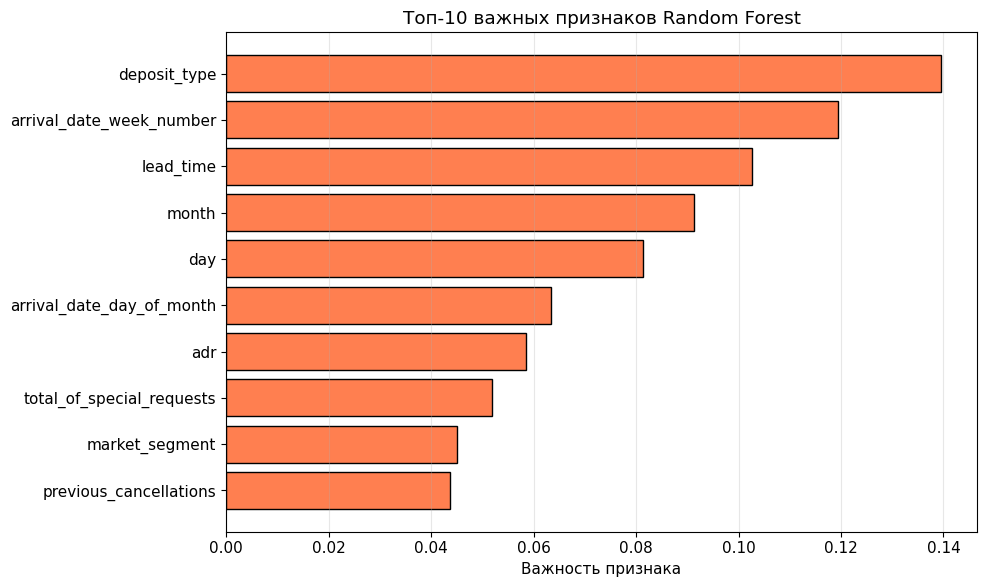

In [ ]:
random_forest = RandomForestClassifier(
    n_estimators=150,
    max_depth=30,
    random_state=42,
    max_features='sqrt'
)

random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)

# Основные метрики для сравнения
rf_results = {
    'Accuracy': accuracy_score(y_test, rf_pred),
    'Precision': precision_score(y_test, rf_pred),
    'Recall': recall_score(y_test, rf_pred),
    'F1-Score': f1_score(y_test, rf_pred)
}

print("+--------- Random Forest ---------+")
print(f"Количество деревьев: {random_forest.n_estimators}")
for metric, value in rf_results.items():
    print(f"{metric}: {value:.4f}")

feature_importance = pd.DataFrame({
    'Признак': X_train.columns,
    'Важность': random_forest.feature_importances_
}).sort_values('Важность', ascending=False)

print("\n+--------- Топ-5 важных признаков ---------+")
print(feature_importance.head(5))

plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['Важность'].values[::-1],
         color='coral', edgecolor='black')
plt.yticks(range(len(top_features)), top_features['Признак'].values[::-1])
plt.xlabel('Важность признака')
plt.title('Топ-10 важных признаков Random Forest')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


### Три модели градиентного бустинга(XGBoost, LightGBM и CatBoost)


---

Их сравнение по времени обучния.

XGBoost

In [ ]:
import time

advanced_boosting_results = {}
advanced_boosting_predictions = {}
training_times = {}
start_time = time.time()

xgb_model = xgb.XGBClassifier(
    n_estimators=150,
    learning_rate=0.4,
    max_depth=15,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_time = time.time() - start_time

advanced_boosting_results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, xgb_pred),
    'Precision': precision_score(y_test, xgb_pred),
    'Recall': recall_score(y_test, xgb_pred),
    'F1-Score': f1_score(y_test, xgb_pred)
}

advanced_boosting_predictions['XGBoost'] = xgb_pred
training_times['XGBoost'] = xgb_time

print("+--------- XGBoost ---------+")
for metric, value in advanced_boosting_results['XGBoost'].items():
    print(f"{metric}: {value:.4f}")
print(f"Время обучения: {xgb_time:.3f} секунд")

+--------- XGBoost ---------+
Accuracy: 0.9982
Precision: 0.9986
Recall: 0.9964
F1-Score: 0.9975
Время обучения: 4.395 секунд


LightGBM

In [ ]:
start_time = time.time()

lgb_model = lgb.LGBMClassifier(
    n_estimators=155,
    learning_rate=0.5,
    max_depth=15,
    random_state=42,
    verbose=-1
)

lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
lgb_time = time.time() - start_time

advanced_boosting_results['LightGBM'] = {
    'Accuracy': accuracy_score(y_test, lgb_pred),
    'Precision': precision_score(y_test, lgb_pred),
    'Recall': recall_score(y_test, lgb_pred),
    'F1-Score': f1_score(y_test, lgb_pred)
}

advanced_boosting_predictions['LightGBM'] = lgb_pred
training_times['LightGBM'] = lgb_time

print("+--------- LightGBM ---------+")
for metric, value in advanced_boosting_results['LightGBM'].items():
    print(f"{metric}: {value:.4f}")
print(f"Время обучения: {lgb_time:.3f} секунд")

+--------- LightGBM ---------+
Accuracy: 0.9993
Precision: 0.9986
Recall: 0.9994
F1-Score: 0.9990
Время обучения: 2.408 секунд


CatBoost

In [ ]:
start_time = time.time()

cat_model = cb.CatBoostClassifier(
    iterations=150,
    learning_rate=0.4,
    depth=15,
    random_state=42,
    verbose=False
)

cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
cat_time = time.time() - start_time

advanced_boosting_results['CatBoost'] = {
    'Accuracy': accuracy_score(y_test, cat_pred),
    'Precision': precision_score(y_test, cat_pred),
    'Recall': recall_score(y_test, cat_pred),
    'F1-Score': f1_score(y_test, cat_pred)
}

advanced_boosting_predictions['CatBoost'] = cat_pred
training_times['CatBoost'] = cat_time

print("+--------- CatBoost ---------+")
for metric, value in advanced_boosting_results['CatBoost'].items():
    print(f"{metric}: {value:.4f}")
print(f"Время обучения: {cat_time:.3f} секунд")


+--------- CatBoost ---------+
Accuracy: 0.9943
Precision: 0.9982
Recall: 0.9863
F1-Score: 0.9922
Время обучения: 130.606 секунд


 Сравнение трех моделей градиентного бустинга.

+--------- Сравнение трех библиотек градиентного бустинга ---------+
          Accuracy  Precision  Recall  F1-Score
LightGBM    0.9993     0.9986  0.9994    0.9990
XGBoost     0.9982     0.9986  0.9964    0.9975
CatBoost    0.9943     0.9982  0.9863    0.9922

+--------- Время обучения ---------+
XGBoost: 4.395 секунд
LightGBM: 2.408 секунд
CatBoost: 130.606 секунд


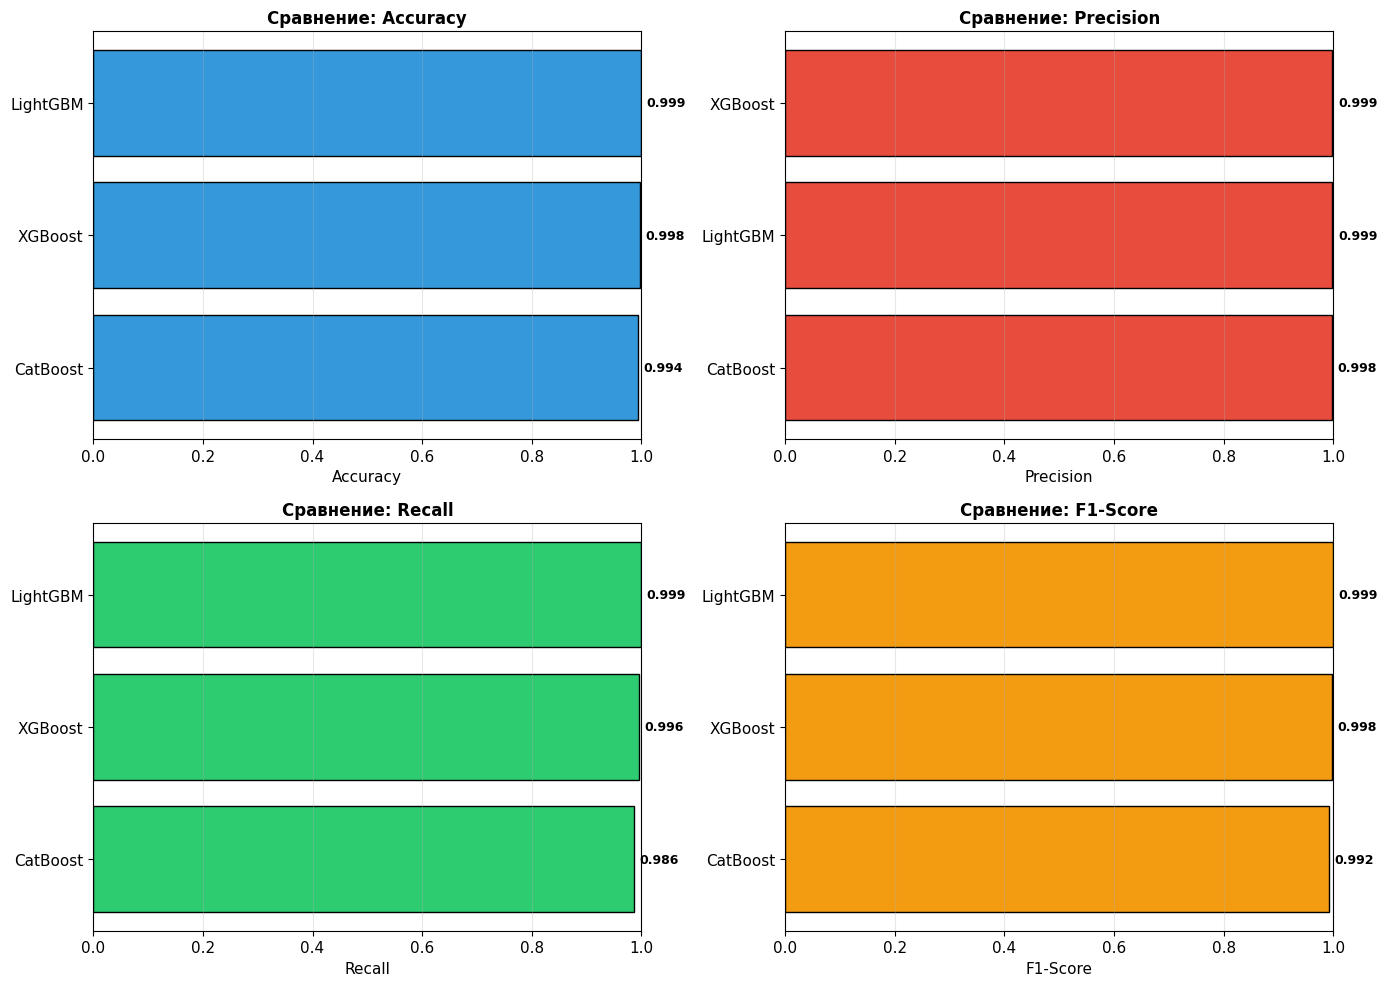

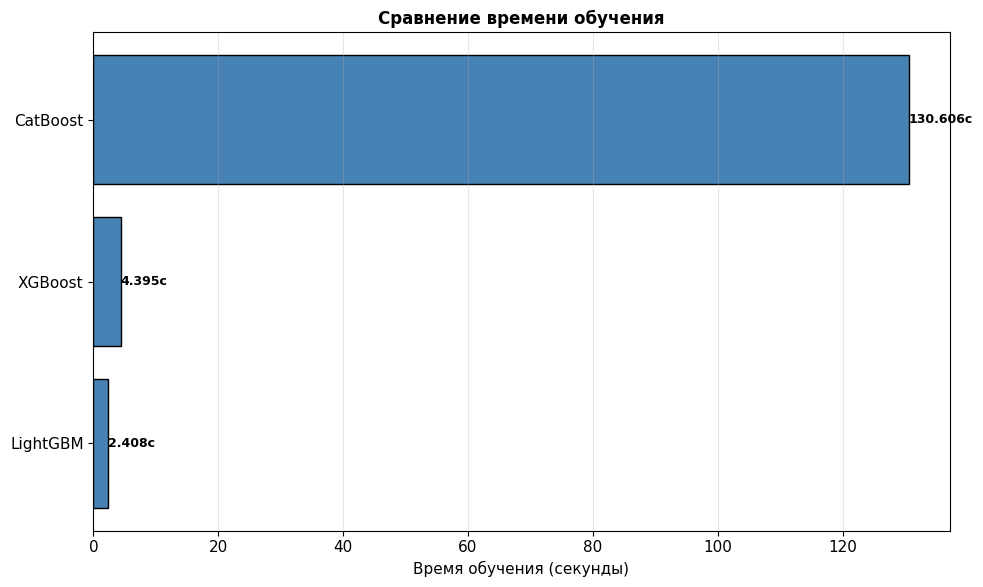

In [ ]:
if len(advanced_boosting_results) > 0:
    all_boosting_results = advanced_boosting_results.copy()
    boosting_comparison = pd.DataFrame(all_boosting_results).T
    boosting_comparison = boosting_comparison.sort_values('Accuracy', ascending=False)
    boosting_comparison = boosting_comparison.round(4)

    print("+--------- Сравнение трех библиотек градиентного бустинга ---------+")
    print(boosting_comparison)

    if len(training_times) > 0:
        print("\n+--------- Время обучения ---------+")
        for model, time_val in training_times.items():
            print(f"{model}: {time_val:.3f} секунд")

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    colors_boost = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

    for idx, metric in enumerate(metrics_list):
        ax = axes[idx // 2, idx % 2]
        values = boosting_comparison[metric].sort_values(ascending=True)
        bars = ax.barh(range(len(values)), values.values,
                      color=colors_boost[idx], edgecolor='black')
        ax.set_yticks(range(len(values)))
        ax.set_yticklabels(values.index)
        ax.set_xlabel(f'{metric}', fontsize=11)
        ax.set_title(f'Сравнение: {metric}', fontsize=12, fontweight='bold')
        ax.set_xlim(0, 1)
        ax.grid(True, alpha=0.3, axis='x')

        for i, (bar, val) in enumerate(zip(bars, values.values)):
            ax.text(val + 0.01, i, f'{val:.3f}', va='center', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()

    if len(training_times) > 0:
        fig, ax = plt.subplots(figsize=(10, 6))
        times_df = pd.DataFrame(list(training_times.items()), columns=['Модель', 'Время (сек)'])
        times_df = times_df.sort_values('Время (сек)')

        bars = ax.barh(range(len(times_df)), times_df['Время (сек)'].values,
                      color='steelblue', edgecolor='black')
        ax.set_yticks(range(len(times_df)))
        ax.set_yticklabels(times_df['Модель'].values)
        ax.set_xlabel('Время обучения (секунды)', fontsize=11)
        ax.set_title('Сравнение времени обучения', fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='x')

        for i, (bar, val) in enumerate(zip(bars, times_df['Время (сек)'].values)):
            ax.text(val + 0.001, i, f'{val:.3f}с', va='center', fontsize=9, fontweight='bold')

        plt.tight_layout()
        plt.show()


### Сравнение всех моделей.

In [ ]:
all_results = {
    **{k: v for k, v in base_results.items()},
    'Hard Voting': hard_results,
    'Soft Voting': soft_results,
    'Bagging DT': bagging_results,
    'Random Forest': rf_results,
    **advanced_boosting_results
}

comparison_df = pd.DataFrame(all_results).T
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)
comparison_df = comparison_df.round(4)

print("+--------- Полное сравнение всех моделей ---------+")
print(comparison_df)

best_model = comparison_df.index[0]
print(f"\nЛучшая модель: {best_model}")
print(f"Accuracy: {comparison_df.loc[best_model, 'Accuracy']:.4f}")


+--------- Полное сравнение всех моделей ---------+
                     Accuracy  Precision  Recall  F1-Score
LightGBM               0.9993     0.9986  0.9994    0.9990
XGBoost                0.9982     0.9986  0.9964    0.9975
CatBoost               0.9943     0.9982  0.9863    0.9922
Bagging DT             0.9750     0.9959  0.9363    0.9652
Random Forest          0.9556     0.9828  0.8958    0.9372
Soft Voting            0.9441     0.9736  0.8728    0.9205
Decision Tree          0.9231     0.8980  0.8939    0.8959
Hard Voting            0.9193     0.9806  0.7980    0.8799
Logistic Regression    0.8138     0.8946  0.5637    0.6916
KNN                    0.8096     0.8013  0.6463    0.7155

Лучшая модель: LightGBM
Accuracy: 0.9993


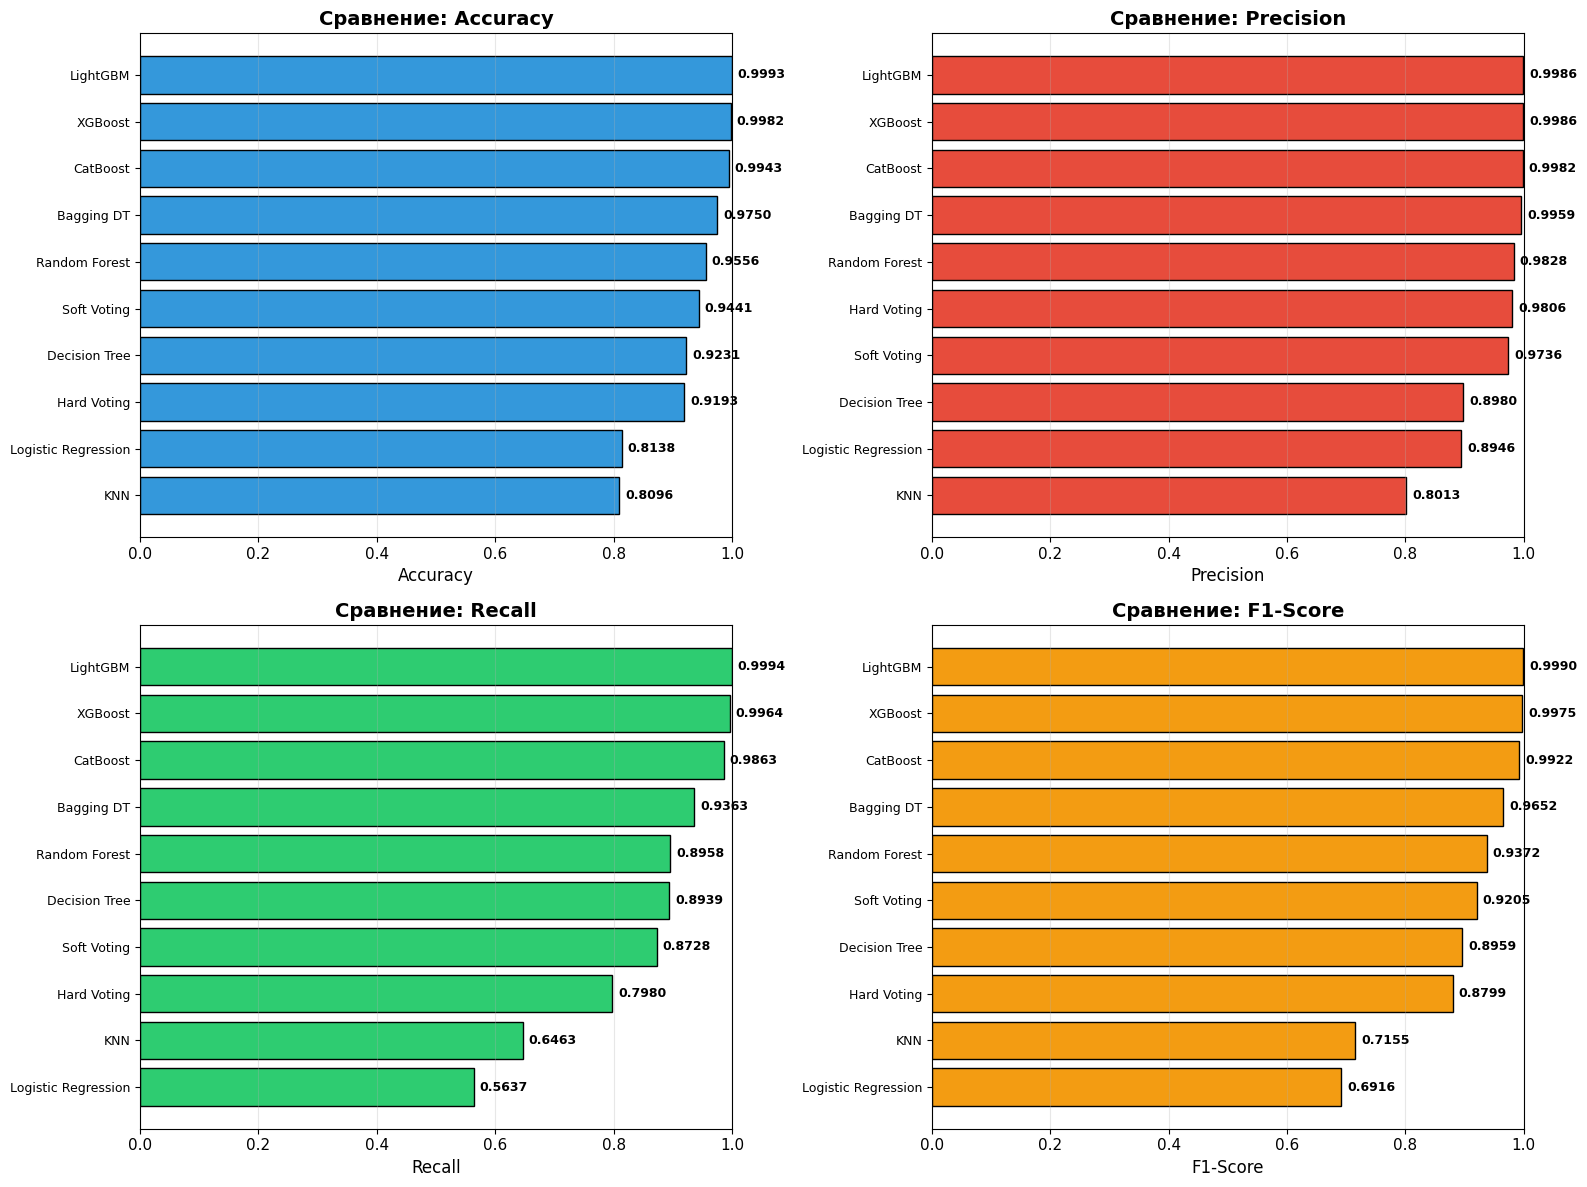

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors_list = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx // 2, idx % 2]
    values = comparison_df[metric].sort_values(ascending=True)
    bars = ax.barh(range(len(values)), values.values, color=colors_list[idx], edgecolor='black')
    ax.set_yticks(range(len(values)))
    ax.set_yticklabels(values.index, fontsize=9)
    ax.set_xlabel(f'{metric}', fontsize=12)
    ax.set_title(f'Сравнение: {metric}', fontsize=14, fontweight='bold')
    ax.set_xlim(0, 1)
    ax.grid(True, alpha=0.3, axis='x')

    for i, (bar, val) in enumerate(zip(bars, values.values)):
        ax.text(val + 0.01, i, f'{val:.4f}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


Матрица ошибок

Бронь не подтверждена - 0
Бронь подтверждена - 1


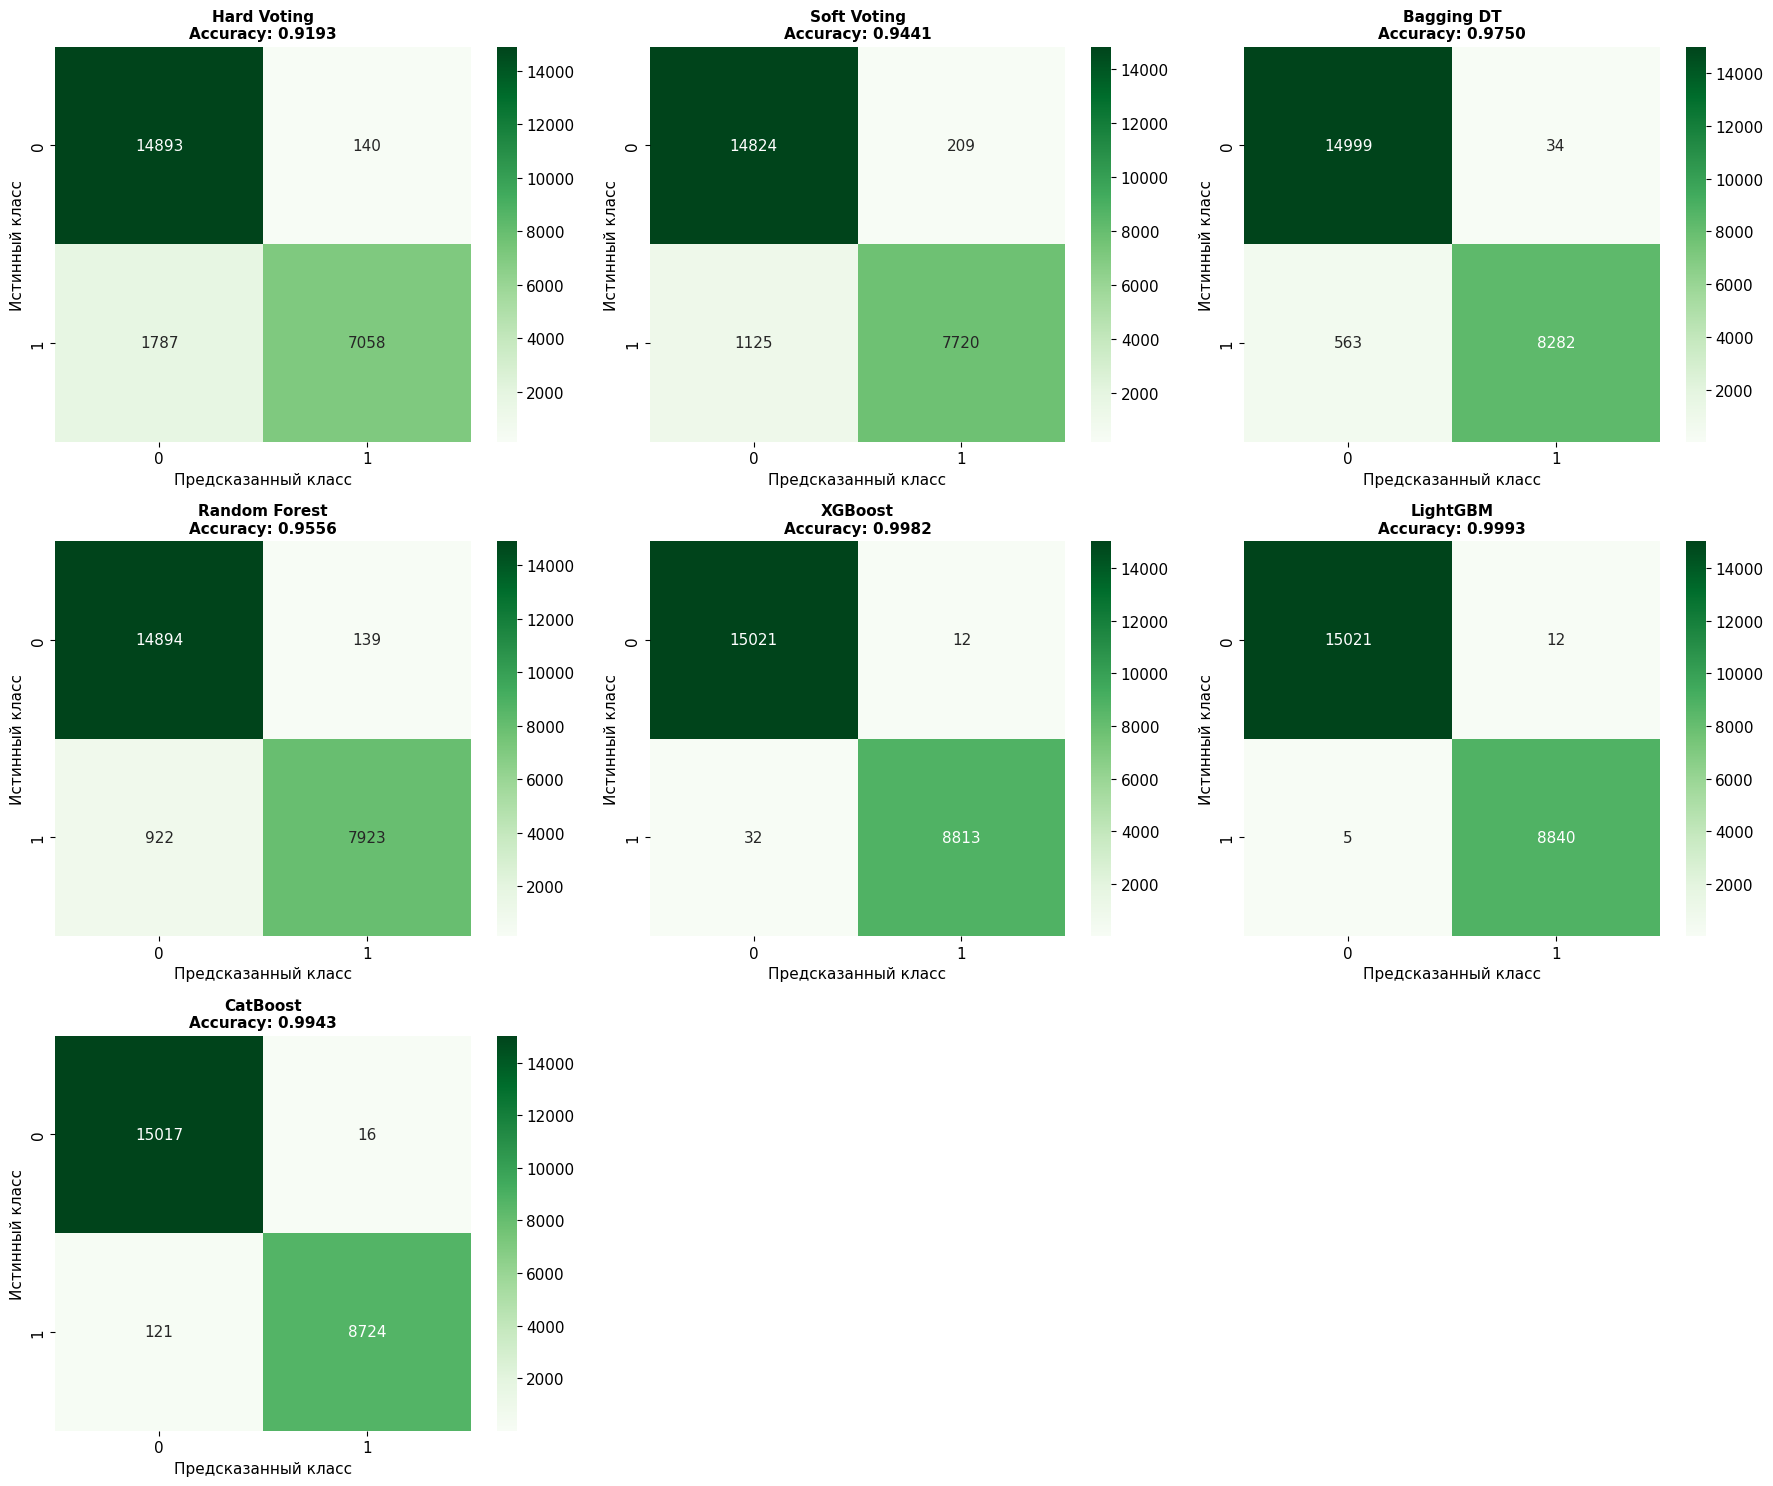

In [ ]:
print('Бронь не подтверждена - 0')
print('Бронь подтверждена - 1')

ensemble_predictions = {
    'Hard Voting': hard_pred,
    'Soft Voting': soft_pred,
    'Bagging DT': bagging_pred,
    'Random Forest': rf_pred,
    **advanced_boosting_predictions
}

n_models = len(ensemble_predictions)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, (name, pred) in enumerate(ensemble_predictions.items()):
    ax = axes[i]
    cm = confusion_matrix(y_test, pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax,
                xticklabels=[0, 1],
                yticklabels=[0, 1])
    ax.set_title(f'{name}\nAccuracy: {comparison_df.loc[name, "Accuracy"]:.4f}',
                     fontweight='bold', fontsize=11)
    ax.set_ylabel('Истинный класс')
    ax.set_xlabel('Предсказанный класс')

for j in range(n_models, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
comparison_summary = comparison_df.copy()
comparison_summary['Тип'] = ['Базовая' if 'Base:' in idx else 'Ансамбль' for idx in comparison_summary.index]
comparison_summary['Метод'] = comparison_summary.index.str.replace('Base: ', '')

print("+--------- Финальное сравнение всех методов ---------+")
print(comparison_summary[['Тип', 'Accuracy', 'Precision', 'Recall', 'F1-Score']])

print("\n+--------- Топ-5 методов ---------+")
print(comparison_summary.head(5)[['Accuracy', 'Precision', 'Recall', 'F1-Score']])

print(f"\n✨ Лучший результат: {best_model}")
print(f"✨   Accuracy: {comparison_df.loc[best_model, 'Accuracy']:.4f}")


+--------- Финальное сравнение всех методов ---------+
                          Тип  Accuracy  Precision  Recall  F1-Score
LightGBM             Ансамбль    0.9993     0.9986  0.9994    0.9990
XGBoost              Ансамбль    0.9982     0.9986  0.9964    0.9975
CatBoost             Ансамбль    0.9943     0.9982  0.9863    0.9922
Bagging DT           Ансамбль    0.9750     0.9959  0.9363    0.9652
Random Forest        Ансамбль    0.9556     0.9828  0.8958    0.9372
Soft Voting          Ансамбль    0.9441     0.9736  0.8728    0.9205
Decision Tree        Ансамбль    0.9231     0.8980  0.8939    0.8959
Hard Voting          Ансамбль    0.9193     0.9806  0.7980    0.8799
Logistic Regression  Ансамбль    0.8138     0.8946  0.5637    0.6916
KNN                  Ансамбль    0.8096     0.8013  0.6463    0.7155

+--------- Топ-5 методов ---------+
               Accuracy  Precision  Recall  F1-Score
LightGBM         0.9993     0.9986  0.9994    0.9990
XGBoost          0.9982     0.9986  0.9964 

В результате мы получили отличную точность для решения поставленной задачи о прогнозировании брони в отелях, достигнув максимального показателя Accuracy в 0.9993 с использованием модели LightGBM.🎉🎉🎉
